# Bagging : Trees and random forest
# Boosting : AdaBoost
## Examples on sonar data

### Read Sonar Data from CSV file
See Perceptron_sonar_example for details on the sonar data.

In [2]:
from csv import reader
import numpy as np

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
print("size of sonar dataset = {}".format(np.asarray(dataset).shape))

dataset_X=list()
dataset_y=list()
for i in range(len(dataset)):
    dataset_X.append(dataset[i][:-1])
    dataset_y.append(dataset[i][-1])



FileNotFoundError: [Errno 2] No such file or directory: 'sonar.all-data.csv'

## Decision Tree

In [2]:
from sklearn import tree
from sklearn import metrics
import graphviz 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

nbdepth=3   # try 4 or 5 and decide wether more depth are usefull... 
estimator = tree.DecisionTreeClassifier(max_depth=nbdepth,criterion='gini')


X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.2,random_state=0)
print("resp. length of X_train and X_test are {0} and {1} ".format([len(X_train)],[len(X_test)]))

estimator = estimator.fit(X_train, y_train)
estimator

resp. length of X_train and X_test are [166] and [42] 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

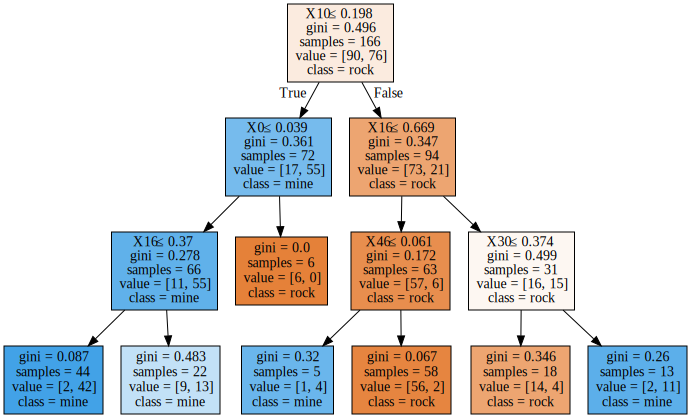

In [3]:
echo_types=['rock','mine']
dot_data = tree.export_graphviz(estimator, out_file=None) 
dot_data = tree.export_graphviz(estimator, out_file=None, 
                                class_names=echo_types,  
                                filled=True,  
                                special_characters=True
                               )  
graph = graphviz.Source(dot_data) 
#graph.render("iris")            #for making a pdf output
graph                           

In [5]:
y_est=estimator.predict(X_train)
print("Confusion matrix from training set :")
print("{}".format(metrics.confusion_matrix(y_est,y_train)))
print("accuracy= {}".format(metrics.accuracy_score(y_est,y_train)))

y_est=estimator.predict(X_test)
print("Confusion matrix from test set :")
print("{}".format(metrics.confusion_matrix(y_est,y_test)))
print("accuracy= {}".format(metrics.accuracy_score(y_est,y_test)))

Confusion matrix from training set :
[[76  6]
 [14 70]]
accuracy= 0.8795180722891566
Confusion matrix from test set :
[[17  5]
 [ 4 16]]
accuracy= 0.7857142857142857


### cross validated performance evaluation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
scores = cross_val_score(estimator, dataset_X, dataset_y, cv=cv)
print("Mean Accuracy and 95 percent confidence interval : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))


Mean Accuracy and 95 percent confidence interval : 0.68 (+/- 0.26)


### Random forest and randomized trees bagging

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0, max_features=8, min_samples_split=2, criterion='entropy')
scores = cross_val_score(clf, dataset_X, dataset_y, cv=10)
print("Mean Accuracy and 95 percent confidence interval RandomForest: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2)) 

clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=0, max_features=6,min_samples_split=2, criterion='entropy')
scores = cross_val_score(clf, dataset_X, dataset_y, cv=10)
print("Mean Accuracy and 95 percent confidence interval ExtraTrees: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))  

Mean Accuracy and 95 percent confidence interval RandomForest: 0.72 (+/- 0.23)
Mean Accuracy and 95 percent confidence interval ExtraTrees: 0.75 (+/- 0.22)


The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [12]:
clf.fit(dataset_X, dataset_y)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
print(std)
indices = np.argsort(importances)[::-1]
indices


[0.01636039 0.01413201 0.0149071  0.02176027 0.01454072 0.01347309
 0.01318274 0.01829479 0.02983903 0.0288508  0.04293245 0.04304464
 0.02492348 0.01300768 0.01582312 0.01858898 0.02264734 0.01872009
 0.01535817 0.02205407 0.02494937 0.01665802 0.01685436 0.01402186
 0.01534522 0.0168625  0.01847317 0.01910079 0.0158729  0.01459415
 0.01532662 0.01385135 0.01061953 0.0154676  0.01511246 0.02556108
 0.02303893 0.01853716 0.01697038 0.0165136  0.01316167 0.01559851
 0.01625244 0.02223046 0.02961036 0.01852541 0.02461016 0.02478157
 0.02942283 0.0120861  0.01820731 0.0164873  0.01615961 0.01773138
 0.01369392 0.0113084  0.01466208 0.01319663 0.01339561 0.01621789]


array([10, 11, 48,  9, 44, 35,  8, 12, 46, 47, 36, 43, 19, 20, 16,  3, 45,
       26, 17, 15, 53, 27, 21, 42,  7, 38, 22, 50, 30, 25, 37, 33, 28, 14,
       51,  0, 24,  5,  1, 41, 39, 13, 34, 59, 31,  4, 29, 40, 56, 52, 58,
       23, 18, 57, 54,  2, 49,  6, 32, 55])

Feature ranking:
1. feature 10 (0.040746)
2. feature 11 (0.038870)
3. feature 48 (0.028562)
4. feature 9 (0.027614)
5. feature 44 (0.027169)
6. feature 35 (0.026573)
7. feature 8 (0.025662)
8. feature 12 (0.025357)
9. feature 46 (0.025110)
10. feature 47 (0.022743)


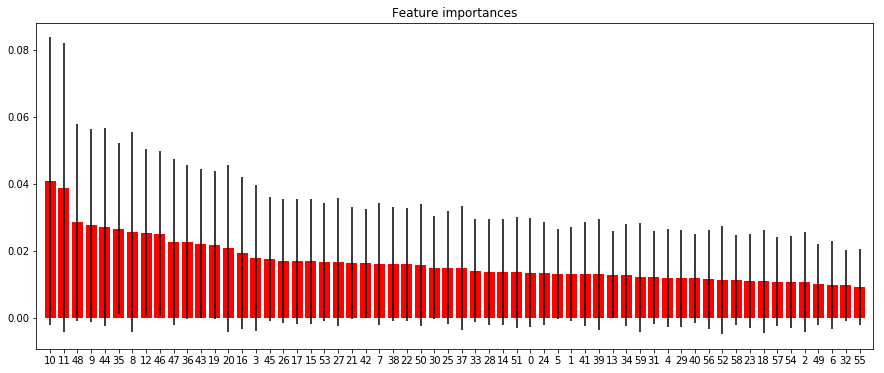

In [13]:


# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    # Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(np.asarray(dataset_X).shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks( range( np.asarray(dataset_X).shape[1]) , indices)
plt.xlim([-1, np.asarray(dataset_X).shape[1]])

plt.show()


## AdaBoost

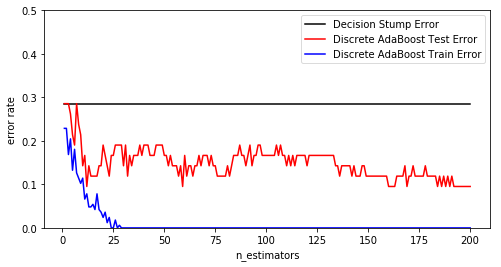

Mean Accuracy and 95 percent confidence interval AdaBoost Discrete: 0.79 (+/- 0.24)


In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss

n_estimators = 200
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.

dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)  # comment this tree!
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

scores = cross_val_score(ada_discrete, dataset_X, dataset_y, cv=10)
print("Mean Accuracy and 95 percent confidence interval AdaBoost Discrete: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2)) 

